In [6]:
import sys, os
sys.path.append('./deep-learning-from-scratch-master/')

from dataset.mnist import load_mnist
from PIL import Image

import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

テストデータの読み込み
---

In [2]:
# flatten: 一次元配列に変換するか(falseのときは1*28*28)
# normalize: 入力画像の値を0.0~1.0の値に正規化するか(入力画像のピクセルは0-255)
# one-hot: ラベルをone-hot表現にするかどうか
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [9]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    plt.imshow(np.array(pil_img))

画像の表示
---

5
(784,)
(28, 28)


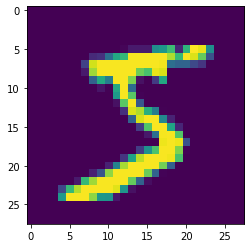

In [10]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
# もとの形状である28*28に再変形する
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

ニューラルネットワークの構築
---

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def soft_max(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [14]:
# テストデータを取得
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

In [15]:
def init_network():
    with open("./deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

In [16]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = soft_max(a3)
    
    return y

In [17]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x))) 

Accuracy:0.9352


データ解説
---

In [19]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)

print(x[0].shape)

print(W1.shape)
print(W2.shape)
print(W3.shape)


(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


- 多次元配列の要素数は各層で一致するように作られている
- 今の構造だと784要素の1次元配列を入力して10要素の1次元配列を出力するという構造

バッチ処理
---
- 入力を複数枚の画像にすることを考える
    - 例えば入力データの形状を100*10にする


In [18]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    # axis=1は列を軸にして最大値のindexを返す
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
